In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] = data.target

In [4]:
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504,280.0
93,-0.049105,-0.044642,-0.064408,-0.102071,-0.002945,-0.015406,0.063367,-0.047243,-0.033249,-0.054925,96.0
215,0.027178,0.050680,0.094031,0.097616,-0.034592,-0.032002,-0.043401,-0.002592,0.036646,0.106617,263.0
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0
373,-0.074533,-0.044642,-0.010517,-0.005671,-0.066239,-0.057054,-0.002903,-0.039493,-0.042572,-0.001078,168.0


In [5]:
df.shape

(442, 11)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=2,test_size=0.2)

In [7]:
#X_train

### 1. How the coefficients get affected

As you increase the value of alpha the value of coefficients will shrink and move towards the value zero. But they will never be 0.

In [8]:
coef_ = []      #Finally it will be a list of lists.
r2_scores = []
alphas = [0,10,100,1000]

for i in alphas:
    rr = Ridge(alpha = i)
    rr.fit(X_train,y_train)
    
    coef_.append(rr.coef_.tolist())
    y_pred = rr.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [9]:
r2_scores

[0.4399387660024644,
 0.15214316037162345,
 0.0103781053510128,
 -0.010136671491364435]

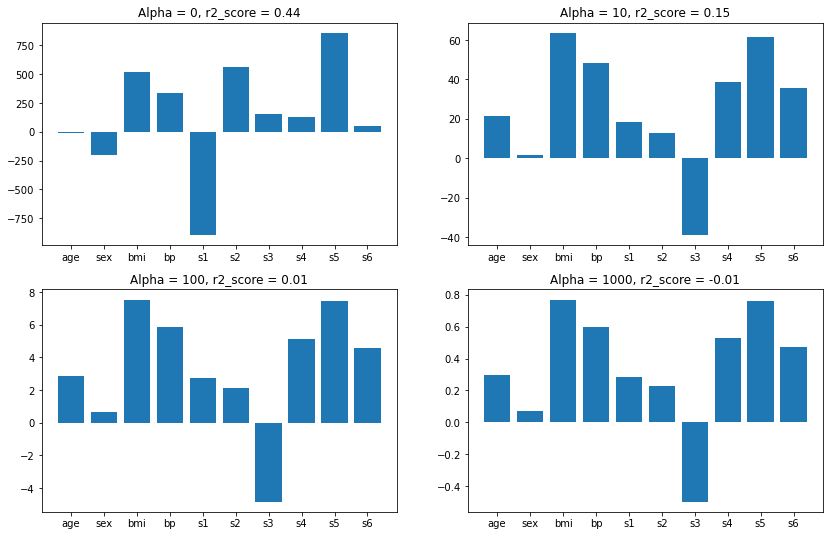

In [10]:
"""
For better understanding look at the scale of y axis. Thus, you can notice that the coefficients are 
shrinking.
"""

plt.figure(figsize=(14,9))
for i in range(4):
    str_ = '{}'.format(i+1)        #format integer value into string
    x = int(str(22) + str_)
    plt.subplot(x)
    plt.bar(data.feature_names,coef_[i])
    plt.title("Alpha = {}, r2_score = {}".format(alphas[i],round(r2_scores[i],2)))

### 2. Higher coefficients are affected more.

After increasing the value of alpha, the coefficients which have the largest values will decrease(if positive coef value) or increase(if negative coef value) faster than the other coefficients.

In [11]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coef_ = []

for i in alphas:
    rr = Ridge(alpha = i)
    rr.fit(X_train,y_train)
    
    coef_.append(rr.coef_.tolist())

In [12]:
input_array = np.array(coef_)
#input_array

In [13]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df = coef_df.set_index('alpha')

In [14]:
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.160885,-205.462260,516.684624,340.627341,-895.543609,561.214533,153.884786,126.734316,861.121400,52.419828
0.0001,-9.118336,-205.337133,516.880570,340.556792,-883.415291,551.553259,148.578680,125.355917,856.480254,52.467627
0.0010,-8.763583,-204.321125,518.371729,339.975385,-787.690766,475.274718,106.786540,114.632063,819.739542,52.872100
0.0100,-6.401088,-198.669767,522.048548,336.348363,-383.709187,152.663678,-66.060583,75.611090,659.869402,55.828128
0.1000,6.642753,-172.242166,485.523872,314.682122,-72.939323,-80.590053,-174.466515,83.616653,484.363285,73.584154
1.0000,42.242217,-57.305508,282.170831,198.061386,14.363544,-22.551274,-136.930053,102.023193,260.104308,98.552274
10.0000,21.174004,1.659796,63.659772,48.493240,18.421492,12.875448,-38.915435,38.842464,61.612405,35.505355
100.0000,2.858979,0.629452,7.540604,5.849997,2.710879,2.142134,-4.834047,5.108223,7.448466,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597829,0.282900,0.225936,-0.495607,0.527031,0.761497,0.471029


In [15]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coef_ = []

for i in alphas:
    rr = Ridge(alpha = i)
    rr.fit(X_train,y_train)
    
    coef_.append(rr.coef_.tolist())

In [16]:
input_array = np.array(coef_).T
input_array.shape

(10, 10)

In [17]:
coef_df = pd.DataFrame(input_array,columns=alphas)
coef_df['features'] = data.feature_names
coef_df = coef_df.set_index('features')
coef_df

,0.0,0.0001,0.0005,0.001,0.005,0.1,0.5,1.0,5.0,10.0
features,,,,,,,,,,
age,-9.160885,-9.118336,-8.954808,-8.763583,-7.551515,6.642753,32.986411,42.242217,32.155953,21.174004
sex,-205.462260,-205.337133,-204.862712,-204.321125,-201.210208,-172.242166,-99.639080,-57.305508,-2.561886,1.659796
bmi,516.684624,516.880570,517.599870,518.371729,521.510271,485.523872,363.415449,282.170831,109.757378,63.659772
bp,340.627341,340.556792,340.287277,339.975385,338.073346,314.682122,247.242261,198.061386,82.259168,48.493240
s1,-895.543609,-883.415291,-838.082185,-787.690766,-534.139045,-72.939323,-5.371795,14.363544,25.513727,18.421492
s2,561.214533,551.553259,515.435253,475.274718,272.943196,-80.590053,-54.587550,-22.551274,14.848399,12.875448
s3,153.884786,148.578680,128.766355,106.786540,-2.735091,-174.466515,-159.832937,-136.930053,-64.240086,-38.915435
s4,126.734316,125.355917,120.240850,114.632063,88.316186,83.616653,103.880685,102.023193,60.809999,38.842464
s5,861.121400,856.480254,839.106530,819.739542,720.876548,484.363285,337.314909,260.104308,104.577062,61.612405


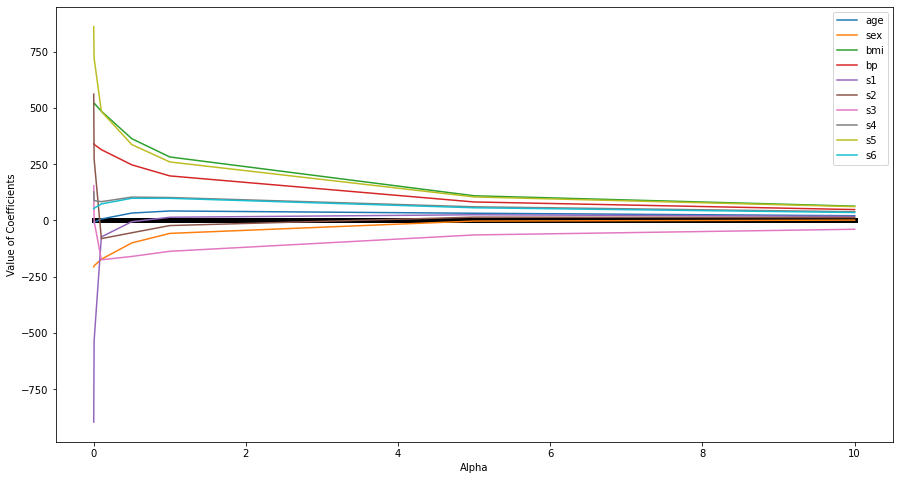

In [18]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color = 'black',linewidth = 5) #plt.plot(x,y)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label = data.feature_names[i])
plt.xlabel('Alpha')
plt.ylabel('Value of Coefficients')
#plt.tight_layout()
plt.legend()

### 3. Bias Variance Tradeoff on Regularization.

When you regularize your overfitted model, in that case the bias gets increased and the variance becomes low. 

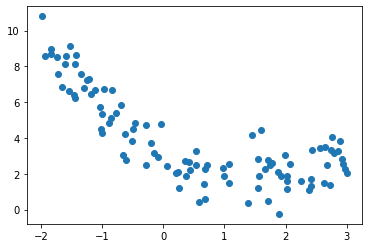

In [126]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()

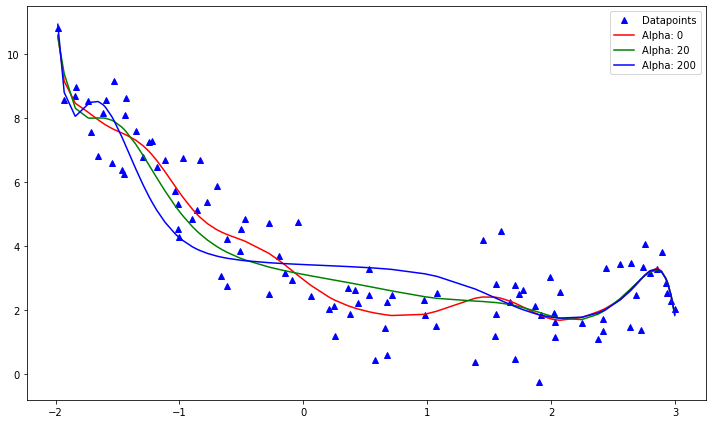

In [127]:
def ridge_curves(x,y,alpha):
    ridge_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree = 16)),
        ('ridge',Ridge(alpha = alpha))
    ])
    
    ridge_regression.fit(x,y)
    return ridge_regression.predict(x)

"""
Using 0 means not including regularization. Thus it will try to overfit.
Using 200 means regularization is too small. Thus it will try to underfit.
Using 20 is optimal for our case.
"""

"""
say m = 2, and m2 = 4, thus multiplying with alphas gives 0,80,800, which are errors
added to the original cost function. As 800 is way more erroneous than 80, thus having this
will underfit the model. 
"""
alphas = [0,20,200]  
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x,y,'b^',label = 'Datapoints')

for alpha,c in zip(alphas,cs):
    pred = ridge_curves(x,y,alpha)
    plt.plot(sorted(x[:,0]),pred[np.argsort(x[:,0])],c,label = 'Alpha: {}'.format(alpha))
    #If the data is not sorted than the graph will look disasterous.
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
#!pip install mlxtend

In [129]:
X_train,X_test,y_train,y_test = train_test_split(x.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)


In [130]:
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

<b>bias_variance_decomp</b> -- This gives us the value of bias and variance for a particular value of alpha.

In [135]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)
loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

In [138]:
#print(loss)
#print(variance)
#print(bias)

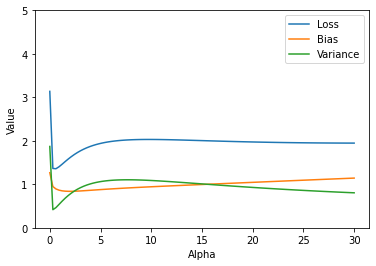

In [137]:
plt.plot(alphas,loss,label='Loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.legend()
plt.savefig('bias_variance_tradeoff_Ridge_Regression.png')

### 4. Effect of Regularization on Loss Function

When you increase the value of alpha the value of coefficient move towards 0 but not exactly to 0 in Ridge Regression

[27.82809103]
-2.29474455867698


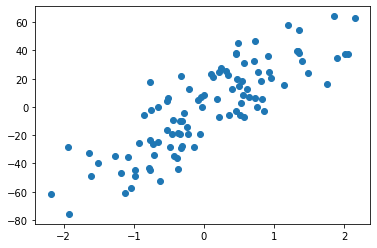

In [144]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [145]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [146]:
def predict(m):
    return m*X - 2.29

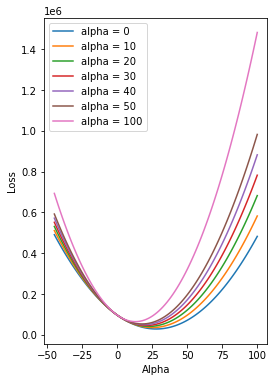

In [147]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()